In [1]:
import numpy as np
import matplotlib.pyplot as plt

(a) Hard sphere scattering

In [2]:
b2max = 2 # ~size of the incoming bin
bins=100 # number of bins
N_tot = 10000000  #Total MC points

theta_list = np.linspace(0,np.pi,bins+1) # bin edges
theta_bins = np.zeros(bins) # the bins themselves

dtheta = theta_list[1]-theta_list[0] # size of each bin


#This is for plotting, these are the bin-centers
thetas=[]
for i in xrange(bins):
    thetas.append(dtheta*i+dtheta/2.0)
thetas = np.array(thetas)


b=np.sqrt(np.random.random(N_tot)*b2max) # uniform distribution of impact paramter

Theta = 2.0*np.arccos(b) # Hard sphere formula

Theta_accepted = Theta[~np.isnan(Theta)] # Delete stuffs that didn't hit the hard sphere

pos_in_bin = (Theta_accepted/dtheta).astype(np.int) #for each particle we find which bin it belongs to

for i in pos_in_bin: #binning process
    theta_bins[i]+=1 

/home/henry/.local/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in arccos


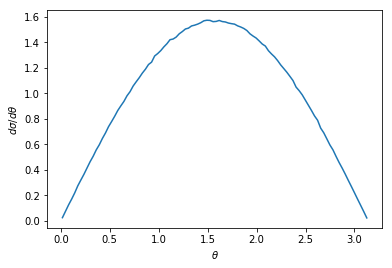

In [3]:
cross_section = b2max*bins*theta_bins/N_tot #Formula to calculate cross section from binned data


plt.plot(thetas,cross_section) #plotting
plt.ylabel("$d\sigma/d\\theta$")
plt.xlabel("$\\theta$")
plt.show()

(b,c)

In [4]:
b2max = 10 # ~size of the incoming bin
b0=1 # this is b_m in solution
bins=100 # number of bins
N_tot = 10000000  #Total MC points

theta_list = np.linspace(0,np.pi,bins+1) # bin edges

dtheta = theta_list[1]-theta_list[0] # size of each bin

#This is for plotting, these are the bin-centers
thetas=[]
for i in xrange(bins):
    thetas.append(dtheta*i+dtheta/2.0)
thetas = np.array(thetas)

In [5]:
# Attractive

theta_bins_attract = np.zeros(bins)

b=np.sqrt(np.random.random(N_tot)*b2max)

#Remove things that fall into center - they won't get detected
b_list = []
for bs in b:
    if bs>b0:
        b_list.append(bs)
b = np.array(b_list)

Theta = np.pi*(1-np.sqrt(1-b0**2/b**2)**-1) 

Theta_accepted = np.arccos(np.cos(Theta[~np.isnan(Theta)]))

pos_in_bin = (Theta_accepted/dtheta).astype(np.int)

for i in pos_in_bin:
    theta_bins_attract[i]+=1

In [6]:
#Repulsive

theta_bins_repel = np.zeros(bins)

b=np.sqrt(np.random.random(N_tot)*b2max)

Theta = np.pi*(1-np.sqrt(1+b0**2/b**2)**-1)

Theta_accepted = np.arccos(np.cos(Theta[~np.isnan(Theta)]))

pos_in_bin = (Theta_accepted/dtheta).astype(np.int)

for i in pos_in_bin:
    theta_bins_repel[i]+=1

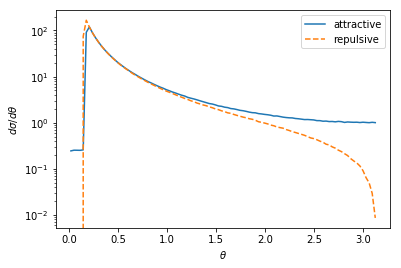

In [7]:
cross_section_attract = b2max*bins*theta_bins_attract/N_tot
cross_section_repel = b2max*bins*theta_bins_repel/N_tot
plt.plot(thetas,cross_section_attract,'-',label='attractive')
plt.plot(thetas,cross_section_repel,'--',label='repulsive')
plt.ylabel("$d\sigma/d\\theta$")
plt.xlabel("$\\theta$")
plt.yscale('log')
plt.legend()
plt.show()